# Data Project - Stock Market Analysis
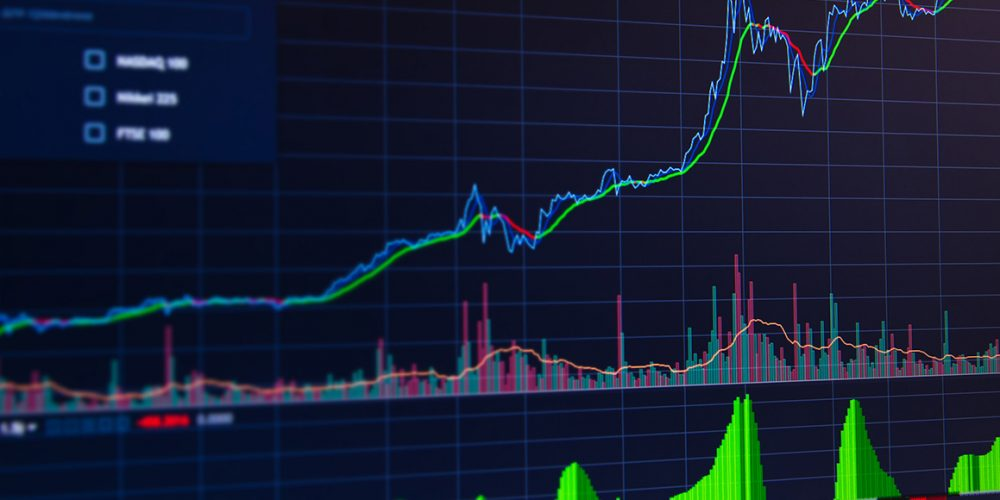

In this notebook we will be looking at data from the stock market, particularly some technology stocks. We will learn how to use pandas to get stock information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a stock, based on its previous performance history. We will also be predicting future stock prices through a Long Short Term Memory (LSTM) method!

We'll be answering the following questions along the way:

    1.) What was the change in price of the stock over time?
    2.) What was the daily return of the stock on average?
    3.) What was the moving average of the various stocks?
    4.) What was the correlation between different stocks'?
    5.) How much value do we put at risk by investing in a particular stock?
    6.) How can we attempt to predict future stock behavior? (Predicting the closing price stock price of APPLE inc using LSTM)
   

# 1. What was the change in price of the stock overtime?

In this section we'll go over how to handle requesting stock information with pandas, and how to analyze basic attributes of a stock.

In [5]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = [12, 9]
%matplotlib inline

# For time stamps
from datetime import datetime
from stocks import api

In [6]:
# The tech stocks we'll use for this analysis
stocks = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

data = api.yf_with_params(tickers=stocks, period="1y")
data.tail(10)

[*********************100%***********************]  4 of 4 completed


GOOG                                      \
                                 Open        High         Low       Close   
Date                                                                        
2022-10-03 00:00:00-04:00   97.220001   99.970001   97.019997   99.300003   
2022-10-04 00:00:00-04:00  101.040001  102.720001  101.040001  102.410004   
2022-10-05 00:00:00-04:00  100.690002  102.739998   99.739998  102.220001   
2022-10-06 00:00:00-04:00  101.500000  103.730003  101.500000  102.239998   
2022-10-07 00:00:00-04:00  100.650002  101.419998   99.209999   99.570000   
2022-10-10 00:00:00-04:00   99.849998   99.989998   97.870003   98.709999   
2022-10-11 00:00:00-04:00   98.250000  100.120003   97.250000   98.050003   
2022-10-12 00:00:00-04:00   98.269997   99.648003   97.669998   98.300003   
2022-10-13 00:00:00-04:00   95.930000  100.529999   95.269997   99.709999   
2022-10-14 00:00:00-04:00  100.625000  101.290001   97.029999   97.180000   

                                                       MSFT              \
                            Adj Close    Volume        Open        High   
Date                                                                      
2022-10-03 00:00:00-04:00   99.300003  24840000  235.410004  241.610001   
2022-10-04 00:00:00-04:00  102.410004  22580900  245.089996  250.360001   
2022-10-05 00:00:00-04:00  102.220001  18475500  245.990005  250.580002   
2022-10-06 00:00:00-04:00  102.239998  17156200  247.929993  250.339996   
2022-10-07 00:00:00-04:00   99.570000  24232300  240.899994  241.320007   
2022-10-10 00:00:00-04:00   98.709999  16529900  233.050003  234.559998   
2022-10-11 00:00:00-04:00   98.050003  21617700  227.619995  229.059998   
2022-10-12 00:00:00-04:00   98.300003  17343400  225.399994  227.860001   
2022-10-13 00:00:00-04:00   99.709999  32812200  219.850006  236.100006   
2022-10-14 00:00:00-04:00   97.180000  22612900  235.539993  237.240005   

                                                   ...        AAPL  \
                                  Low       Close  ...         Low   
Date                                               ...               
2022-10-03 00:00:00-04:00  234.660004  240.740005  ...  137.690002   
2022-10-04 00:00:00-04:00  244.979996  248.880005  ...  144.259995   
2022-10-05 00:00:00-04:00  244.100006  249.199997  ...  143.009995   
2022-10-06 00:00:00-04:00  246.080002  246.789993  ...  145.220001   
2022-10-07 00:00:00-04:00  233.169998  234.240005  ...  139.449997   
2022-10-10 00:00:00-04:00  226.729996  229.250000  ...  138.570007   
2022-10-11 00:00:00-04:00  224.110001  225.410004  ...  138.220001   
2022-10-12 00:00:00-04:00  223.960007  225.750000  ...  138.160004   
2022-10-13 00:00:00-04:00  219.130005  234.240005  ...  134.369995   
2022-10-14 00:00:00-04:00  228.339996  228.559998  ...  138.190002   

                                                                    AMZN  \
                                Close   Adj Close     Volume        Open   
Date                                                                       
2022-10-03 00:00:00-04:00  142.449997  142.449997  114311700  113.580002   
2022-10-04 00:00:00-04:00  146.100006  146.100006   87830100  119.889999   
2022-10-05 00:00:00-04:00  146.399994  146.399994   79471000  118.580002   
2022-10-06 00:00:00-04:00  145.429993  145.429993   68402200  120.769997   
2022-10-07 00:00:00-04:00  140.089996  140.089996   85859100  118.000000   
2022-10-10 00:00:00-04:00  140.419998  140.419998   74899000  115.099998   
2022-10-11 00:00:00-04:00  138.979996  138.979996   77033700  112.709999   
2022-10-12 00:00:00-04:00  138.339996  138.339996   70433700  112.489998   
2022-10-13 00:00:00-04:00  142.990005  142.990005  113224000  107.879997   
2022-10-14 00:00:00-04:00  138.380005  138.380005   88512300  114.099998   

                                                                           \
                                 High         Low       Close   Adj Close   
D

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the AAPL DataFrame to get a feel for the data

In [7]:
# Summary Stats
data.describe()

GOOG                                                  \
             Open        High         Low       Close   Adj Close   
count  252.000000  252.000000  252.000000  252.000000  252.000000   
mean   126.170078  127.766387  124.516400  126.074536  126.074536   
std     15.797281   15.612844   15.674452   15.647616   15.647616   
min     95.930000   99.300003   95.269997   96.150002   96.150002   
25%    112.959747  114.844873  111.755377  113.012751  113.012751   
50%    127.575752  130.586494  126.119373  126.996998  126.996998   
75%    140.940685  142.619003  139.728996  141.347248  141.347248   
max    151.863495  152.100006  149.887497  150.709000  150.709000   

                           MSFT                                      ...  \
             Volume        Open        High         Low       Close  ...   
count  2.520000e+02  252.000000  252.000000  252.000000  252.000000  ...   
mean   2.744872e+07  288.142738  291.445198  284.327579  287.943095  ...   
std    1.024807e+07   30.603780   30.355815   30.618907   30.620440  ...   
min    1.246400e+07  219.850006  227.860001  219.130005  225.410004  ...   
25%    2.054715e+07  262.817497  266.382500  259.030006  262.767502  ...   
50%    2.513300e+07  288.325012  290.809998  280.534988  286.689987  ...   
75%    3.190800e+07  309.690002  312.385002  306.649994  310.325012  ...   
max    8.975000e+07  344.619995  349.670013  342.200012  343.109985  ...   

             AAPL                                              AMZN  \
              Low       Close   Adj Close        Volume        Open   
count  252.000000  252.000000  252.000000  2.520000e+02  252.000000   
mean   156.531944  158.627262  158.239571  8.965653e+07  142.598849   
std     12.405296   12.369310   12.253121  2.654533e+07   23.576866   
min    129.039993  130.059998  129.879593  4.100000e+07  102.750000   
25%    147.584995  149.170006  148.503723  7.057260e+07  120.574997   
50%    156.625000  159.260002  158.877831  8.489835e+07  143.379997   
75%    167.220001  168.970005  168.630119  1.024875e+08  164.981506   
max    179.119995  182.009995  181.259918  1.954327e+08  185.634506   

                                                                     
             High         Low       Close   Adj Close        Volume  
count  252.000000  252.000000  252.000000  252.000000  2.520000e+02  
mean   144.856169  140.214427  142.463018  142.463018  7.209653e+07  
std     23.439481   23.613041   23.486851   23.486851  3.140403e+07  
min    104.580002  101.260002  102.309998  102.309998  3.575400e+07  
25%    122.959999  118.260000  120.965000  120.965000  5.337318e+07  
50%    145.561249  140.580002  143.364998  143.364998  6.356200e+07  
75%    166.510246  163.016506  164.802376  164.802376  8.108058e+07  
max    188.107498  183.785995  184.802994  184.802994  2.726620e+08  

[8 rows x 24 columns]

In [8]:
# General info
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2021-10-15 00:00:00-04:00 to 2022-10-14 00:00:00-04:00
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (GOOG, Open)       252 non-null    float64
 1   (GOOG, High)       252 non-null    float64
 2   (GOOG, Low)        252 non-null    float64
 3   (GOOG, Close)      252 non-null    float64
 4   (GOOG, Adj Close)  252 non-null    float64
 5   (GOOG, Volume)     252 non-null    int64  
 6   (MSFT, Open)       252 non-null    float64
 7   (MSFT, High)       252 non-null    float64
 8   (MSFT, Low)        252 non-null    float64
 9   (MSFT, Close)      252 non-null    float64
 10  (MSFT, Adj Close)  252 non-null    float64
 11  (MSFT, Volume)     252 non-null    int64  
 12  (AAPL, Open)       252 non-null    float64
 13  (AAPL, High)       252 non-null    float64
 14  (AAPL, Low)        252 non-null    float64
 15  (AAPL, Close)      252 no

Convert types and melt dataset

In [9]:
df = data.copy()
df = df.stack(0).reset_index()
df["Date"] = pd.to_datetime(df["Date"])
df

,Date,level_1,Adj Close,Close,High,Low,Open,Volume
0,2021-10-15 00:00:00-04:00,AAPL,144.032898,144.839996,144.899994,143.509995,143.770004,67940300
1,2021-10-15 00:00:00-04:00,AMZN,170.451004,170.451004,170.520996,165.199997,165.570999,103598000
2,2021-10-15 00:00:00-04:00,GOOG,141.675003,141.675003,142.199997,141.064499,142.199997,21250000
3,2021-10-15 00:00:00-04:00,MSFT,301.683411,304.209991,304.450012,300.519989,302.339996,25384800
4,2021-10-18 00:00:00-04:00,AAPL,145.733383,146.550003,146.839996,143.160004,143.449997,85589200
...,...,...,...,...,...,...,...,...
1003,2022-10-13 00:00:00-04:00,MSFT,234.240005,234.240005,236.100006,219.130005,219.850006,42551800
1004,2022-10-14 00:00:00-04:00,AAPL,138.380005,138.380005,144.520004,138.190002,144.309998,88512300
1005,2022-10-14 00:00:00-04:00,AMZN,106.900002,106.900002,114.959999,106.599998,114.099998,67651200
1006,2022-10-14 00:00:00-04:00,GOOG,97.180000,97.180000,101.290001,97.029999,100.625000,22612900


/home/andrew/.cache/pypoetry/virtualenvs/forecast-3HRPtc4U-py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/andrew/.cache/pypoetry/virtualenvs/forecast-3HRPtc4U-py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/andrew/.cache/pypoetry/virtualenvs/forecast-3HRPtc4U-py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/andrew/.cache/pypoetry/virtualenvs/forecast-3HRPtc4U-py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future v

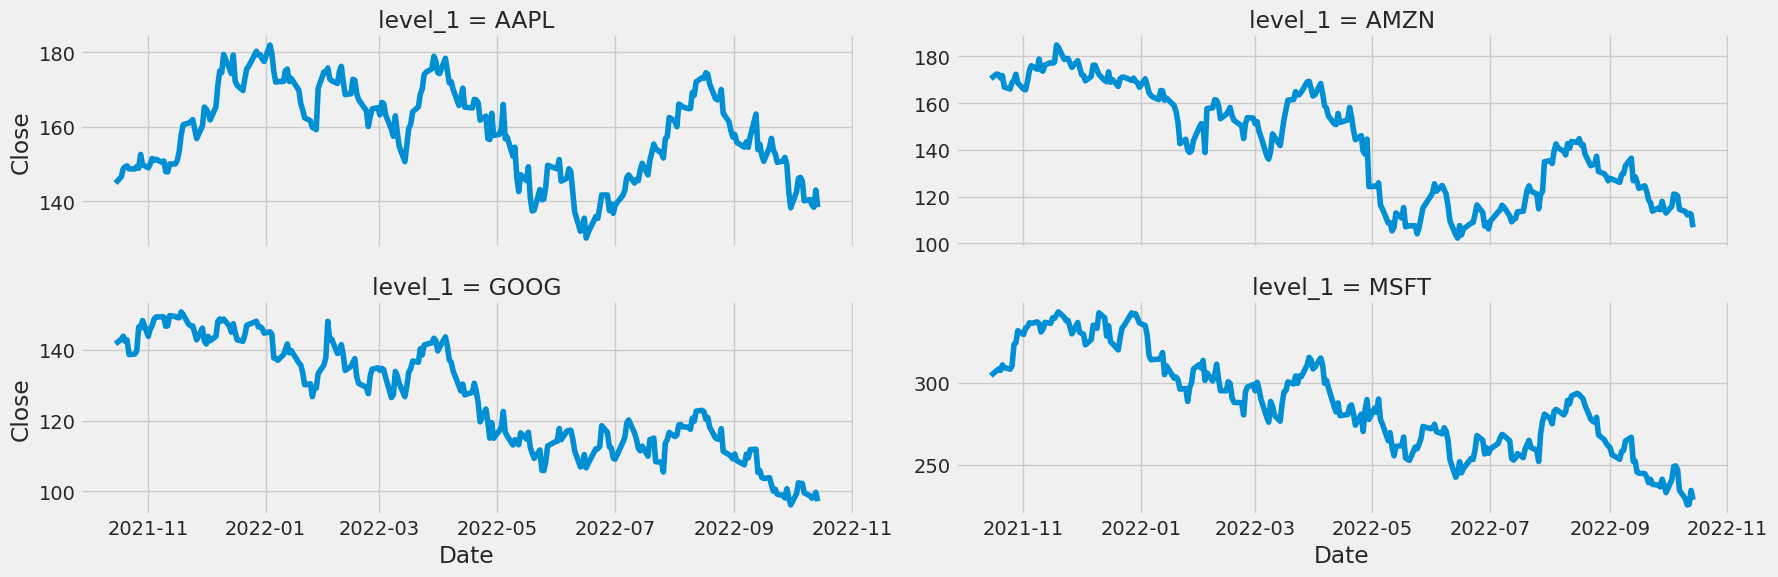

In [10]:
g = sns.FacetGrid(df, col='level_1', col_wrap=2, aspect=3, sharey=False)
g.map(plt.plot, "Date", "Close")

/home/andrew/.cache/pypoetry/virtualenvs/forecast-3HRPtc4U-py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/andrew/.cache/pypoetry/virtualenvs/forecast-3HRPtc4U-py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/andrew/.cache/pypoetry/virtualenvs/forecast-3HRPtc4U-py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_args = [v for k, v in plot_data.iteritems()]
/home/andrew/.cache/pypoetry/virtualenvs/forecast-3HRPtc4U-py3.9/lib/python3.9/site-packages/seaborn/axisgrid.py:745: FutureWarning: iteritems is deprecated and will be removed in a future v

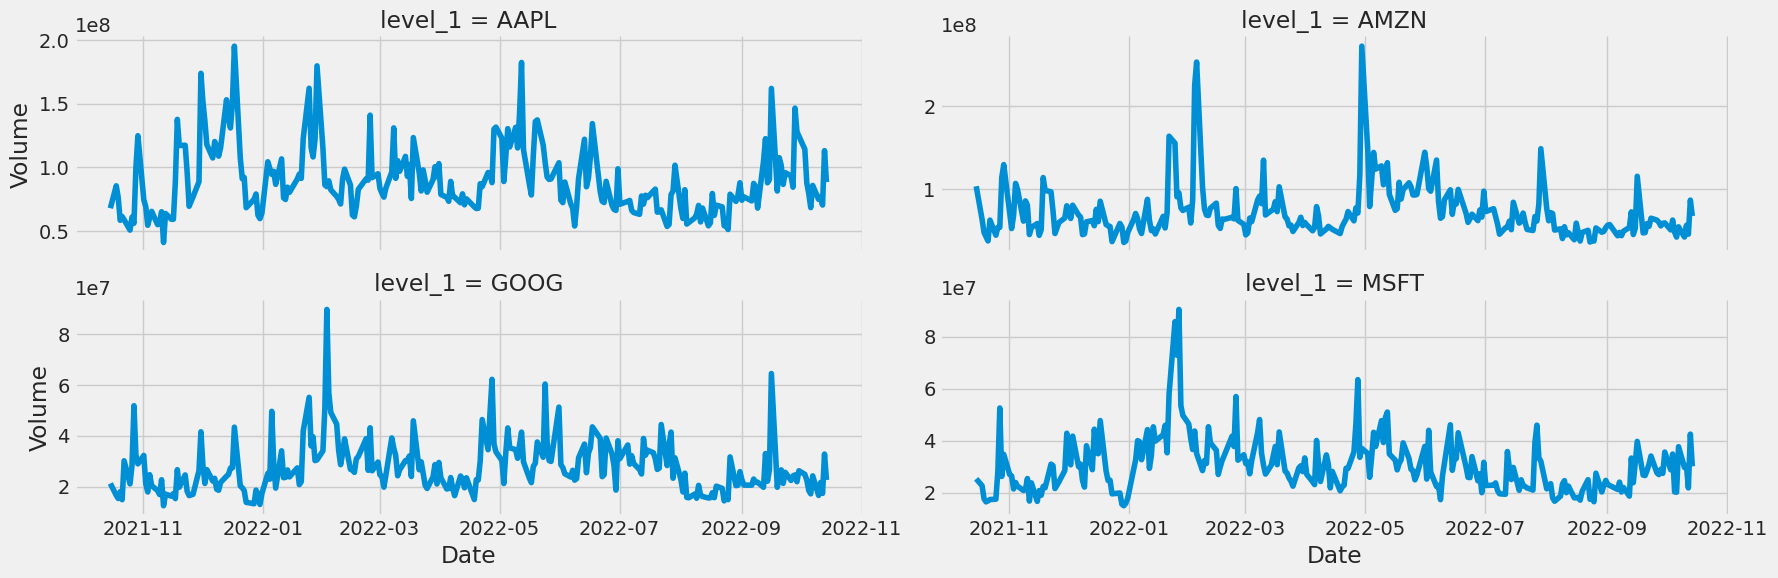

In [11]:
g = sns.FacetGrid(df, col="level_1", col_wrap=2, aspect=3, sharey=False)
g.map(plt.plot, "Date", "Volume")

Now that we've seen the visualizations for the closing price and the volume traded each day, let's go ahead and caculate the moving average for the stock.

# 2. What was the moving average of the various stocks?

In [12]:
avgs = [10, 20, 50]

ma_cols = []
for avg in avgs:
    col = f"MA{avg}"
    df[col] = df.groupby("level_1")["Adj Close"].rolling(avg).mean().reset_index(level=0, drop=True)
    ma_cols.append(col)

df

,Date,level_1,Adj Close,Close,High,Low,Open,Volume,MA10,MA20,MA50
0,2021-10-15 00:00:00-04:00,AAPL,144.032898,144.839996,144.899994,143.509995,143.770004,67940300,NaN,NaN,NaN
1,2021-10-15 00:00:00-04:00,AMZN,170.451004,170.451004,170.520996,165.199997,165.570999,103598000,NaN,NaN,NaN
2,2021-10-15 00:00:00-04:00,GOOG,141.675003,141.675003,142.199997,141.064499,142.199997,21250000,NaN,NaN,NaN
3,2021-10-15 00:00:00-04:00,MSFT,301.683411,304.209991,304.450012,300.519989,302.339996,25384800,NaN,NaN,NaN
4,2021-10-18 00:00:00-04:00,AAPL,145.733383,146.550003,146.839996,143.160004,143.449997,85589200,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
1003,2022-10-13 00:00:00-04:00,MSFT,234.240005,234.240005,236.100006,219.130005,219.850006,42551800,236.740001,238.469501,258.972359
1004,2022-10-14 00:00:00-04:00,AAPL,138.380005,138.380005,144.520004,138.190002,144.309998,88512300,141.957999,146.044998,156.350800
1005,2022-10-14 00:00:00-04:00,AMZN,106.900002,106.900002,114.959999,106.599998,114.099998,67651200,115.098999,116.142000,126.959000
1006,2022-10-14 00:00:00-04:00,GOOG,97.180000,97.180000,101.290001,97.029999,100.625000,22612900,99.769001,99.750000,108.171600


Convert dataframe from wide to long

In [13]:
ma_df = df.melt(id_vars=["Date", "level_1"], value_vars=["Adj Close", *ma_cols])
ma_df

,Date,level_1,variable,value
0,2021-10-15 00:00:00-04:00,AAPL,Adj Close,144.032898
1,2021-10-15 00:00:00-04:00,AMZN,Adj Close,170.451004
2,2021-10-15 00:00:00-04:00,GOOG,Adj Close,141.675003
3,2021-10-15 00:00:00-04:00,MSFT,Adj Close,301.683411
4,2021-10-18 00:00:00-04:00,AAPL,Adj Close,145.733383
...,...,...,...,...
4027,2022-10-13 00:00:00-04:00,MSFT,MA50,258.972359
4028,2022-10-14 00:00:00-04:00,AAPL,MA50,156.350800
4029,2022-10-14 00:00:00-04:00,AMZN,MA50,126.959000
4030,2022-10-14 00:00:00-04:00,GOOG,MA50,108.171600


Now let's go ahead and plot all the additional Moving Averages

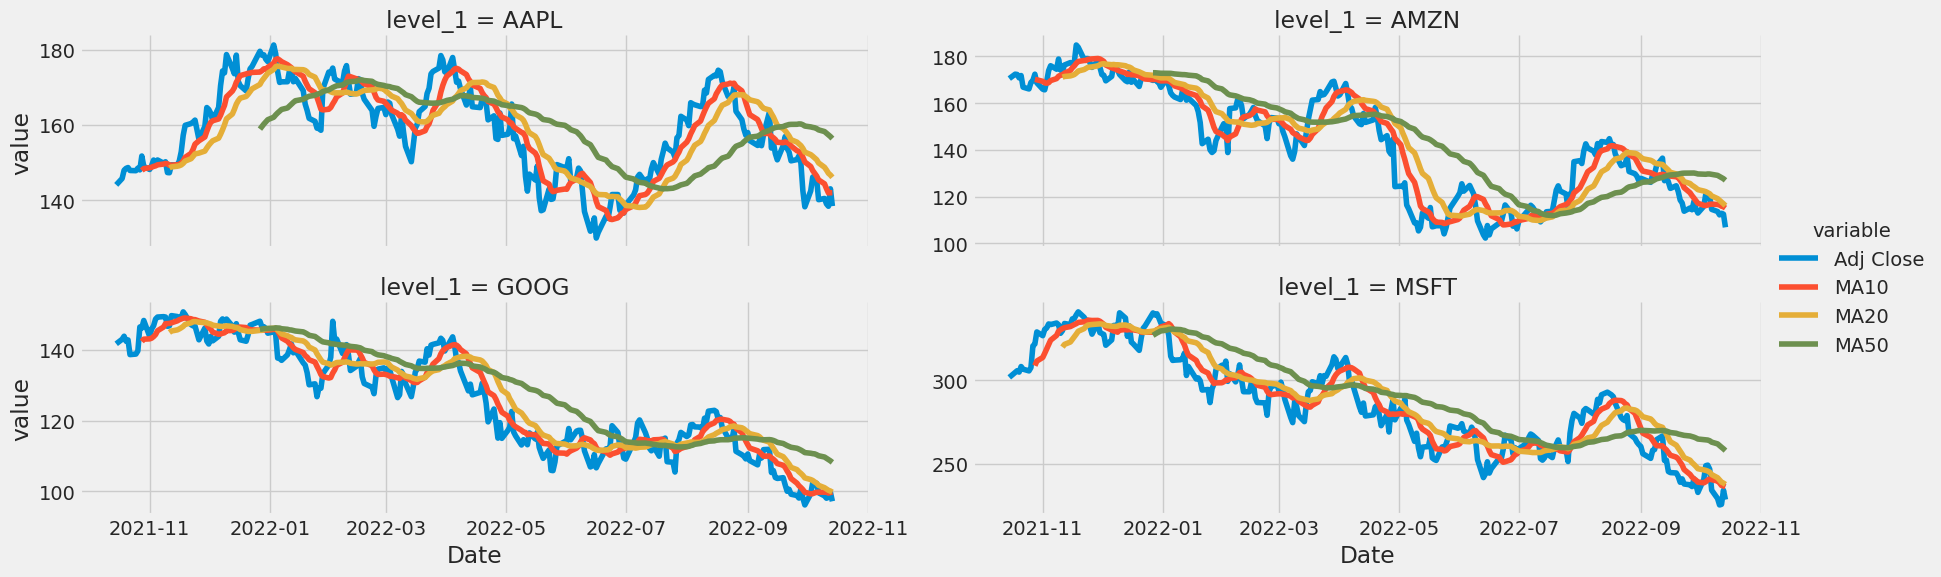

In [14]:
g = sns.FacetGrid(ma_df, col="level_1", hue="variable", col_wrap=2, aspect=3, sharey=False)
g.map_dataframe(sns.lineplot, x="Date", y="value")
g.add_legend()

# 3. What was the daily return of the stock on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the stock. In order to do so we'll need to take a closer look at the daily changes of the stock, and not just its absolute value. Let's go ahead and use pandas to retrieve teh daily returns for the Apple stock.

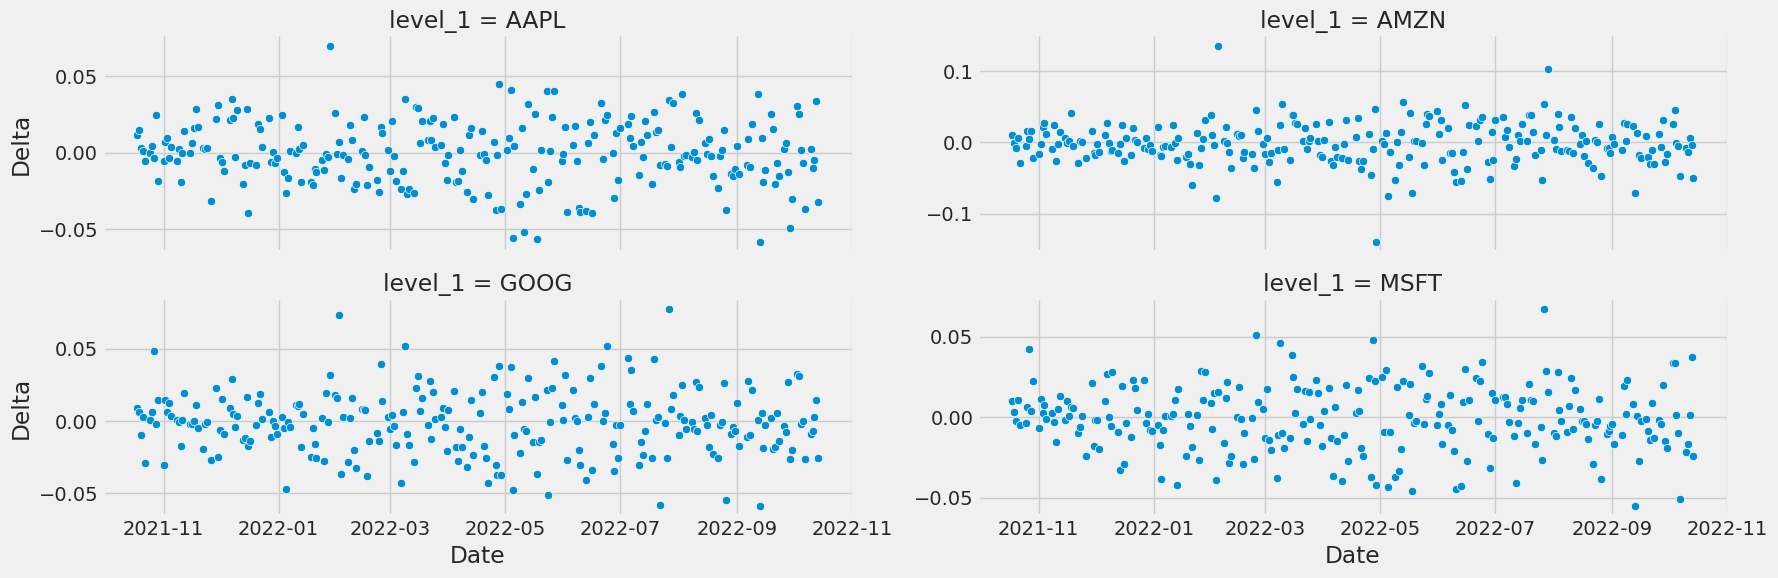

In [15]:
df["Delta"] = df.groupby("level_1")["Adj Close"].pct_change()
g = sns.FacetGrid(df, col="level_1", col_wrap=2, aspect=3, sharey=False)
g.map_dataframe(sns.scatterplot, x="Date", y="Delta")

Great, now let's get an overall look at the average daily return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

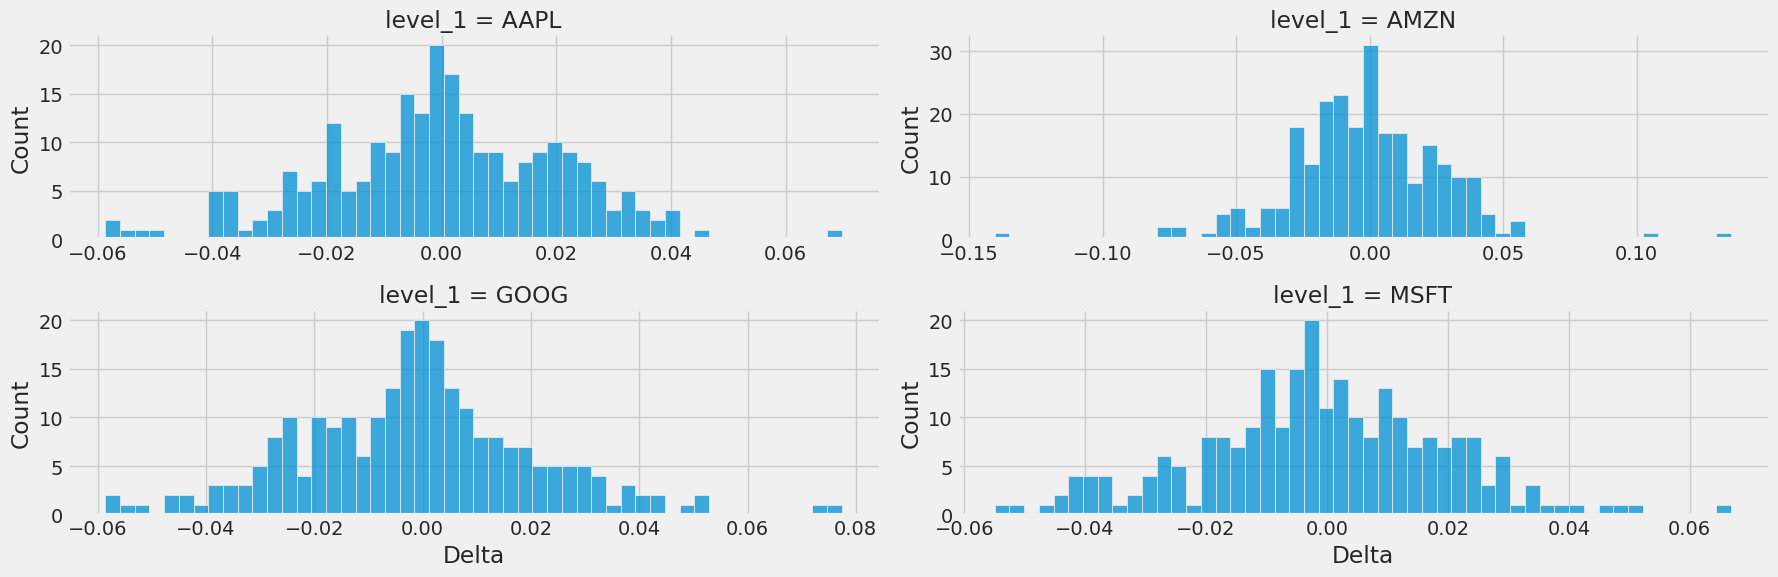

In [16]:
g = sns.FacetGrid(df, col="level_1", col_wrap=2, aspect=3, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="Delta", bins=50)

# 4. What was the correlation between different stocks closing prices?

Now what if we wanted to analyze the returns of all the stocks in our list? Let's go ahead and build a DataFrame with all the ['Close'] columns for each of the stocks dataframes.

StopIteration: 

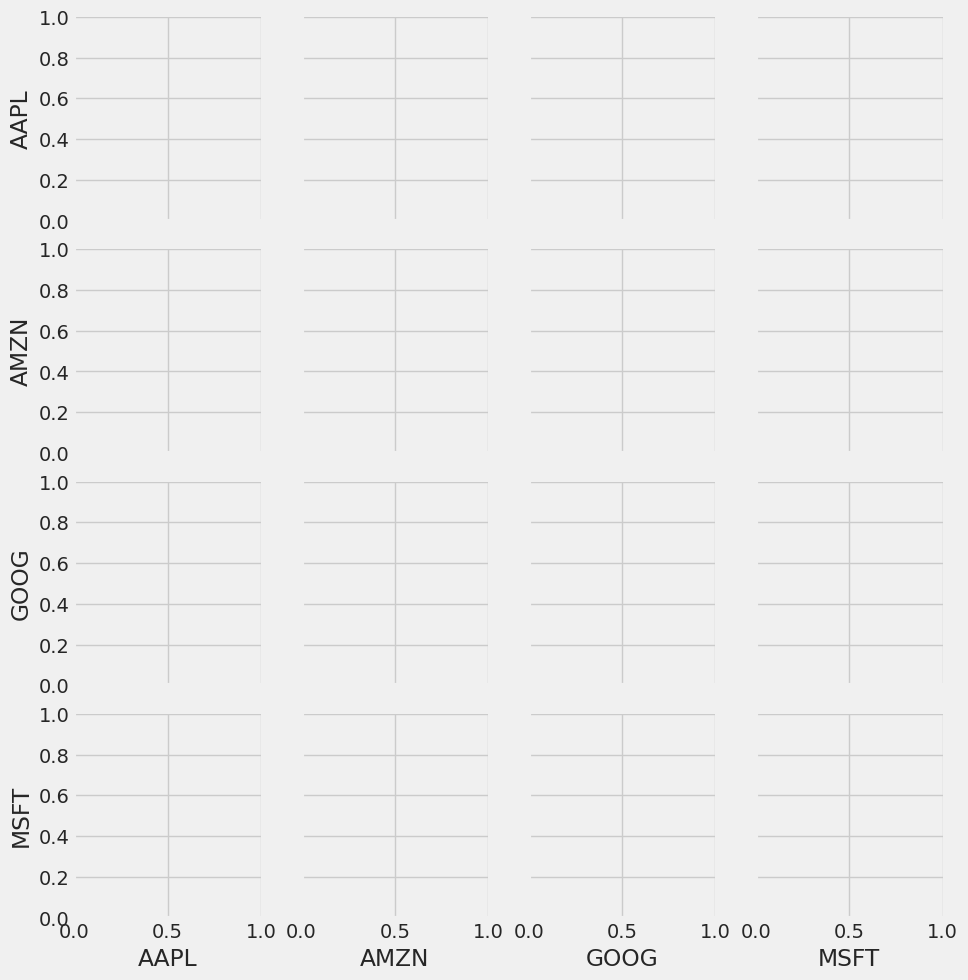

In [26]:
close_df = df.pivot(index="Date", columns="level_1", values="Adj Close").pct_change().dropna()
close_df
sns.pairplot(close_df, kind="reg")

Above we can see all the relationships on daily returns between all the stocks. A quick glance shows an interesting correlation between Google and Amazon daily returns. It might be interesting to investigate that individual comaprison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

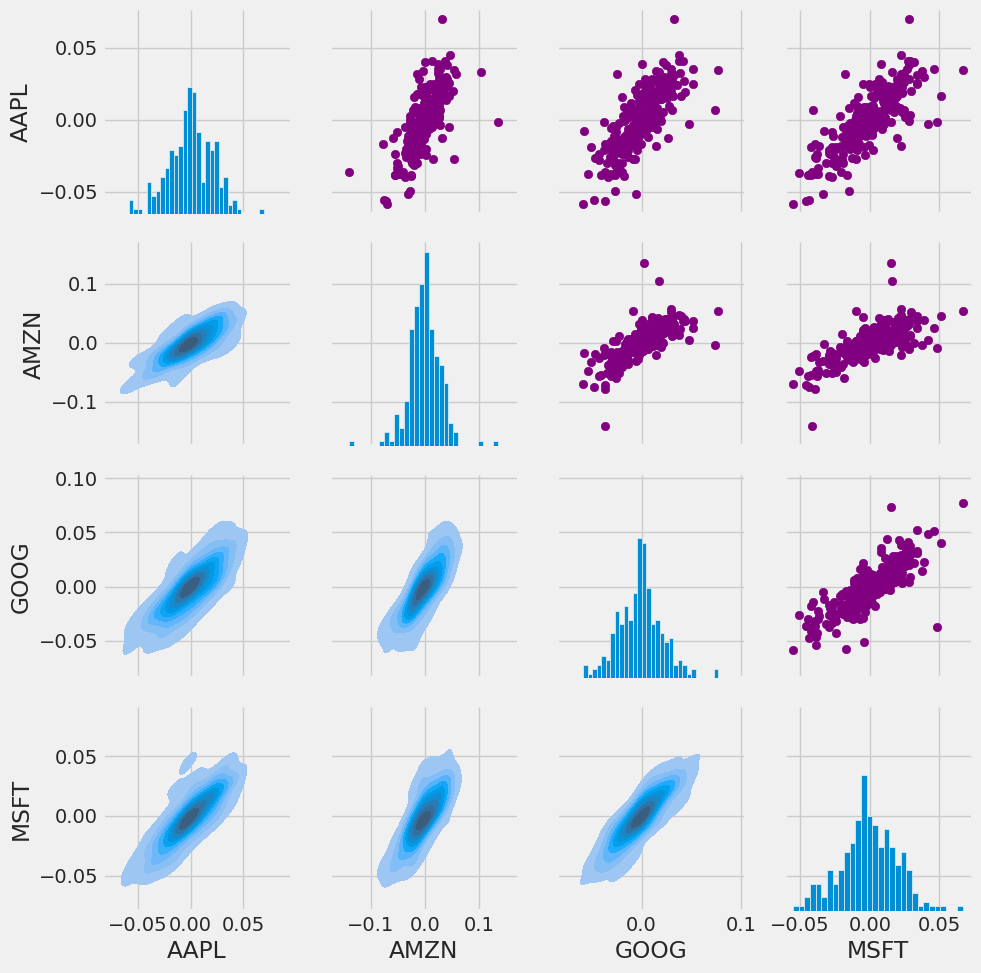

In [30]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(close_df)

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, fill=True)

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the stocks' daily return values. By comparing the closing prices, we see an interesting relationship between Microsoft and Apple.

<AxesSubplot: xlabel='level_1', ylabel='level_1'>

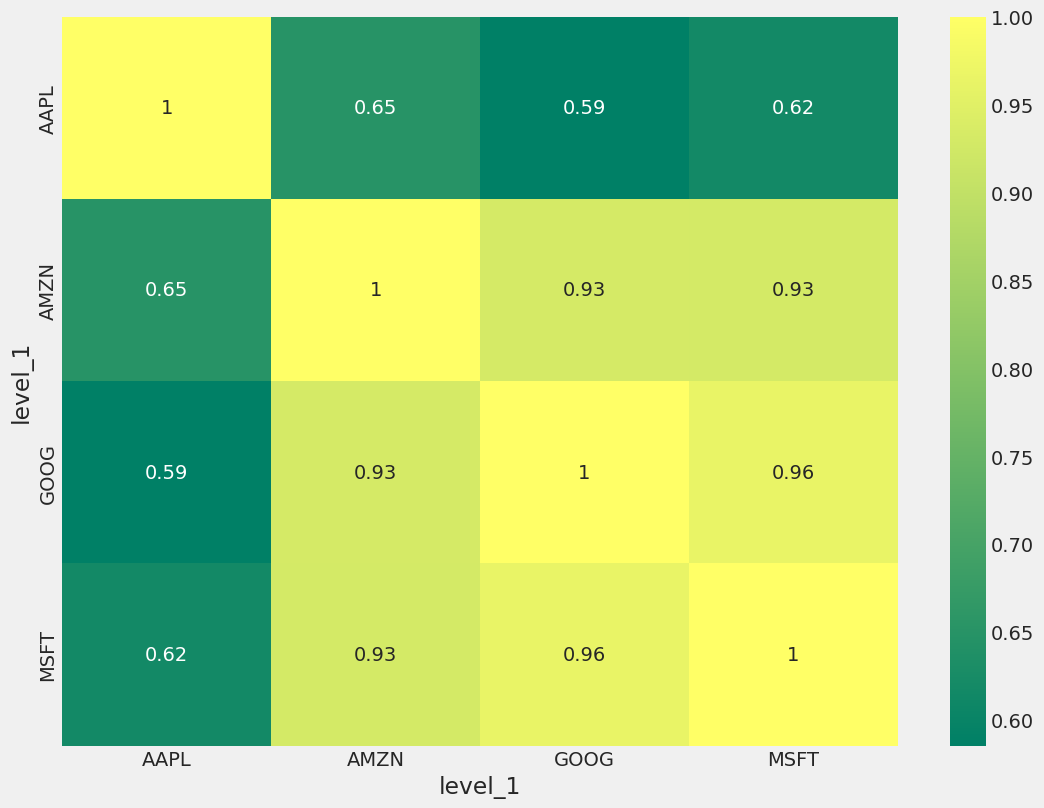

In [25]:
# Let's go ahead and use sebron for a quick correlation plot for the daily returns
sns.heatmap(close_df.corr(), annot=True, cmap='summer')

Fantastic! Just like we suspected in our PairPlot we see here numerically and visually that Microsoft and Amazon had the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

# 5. How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

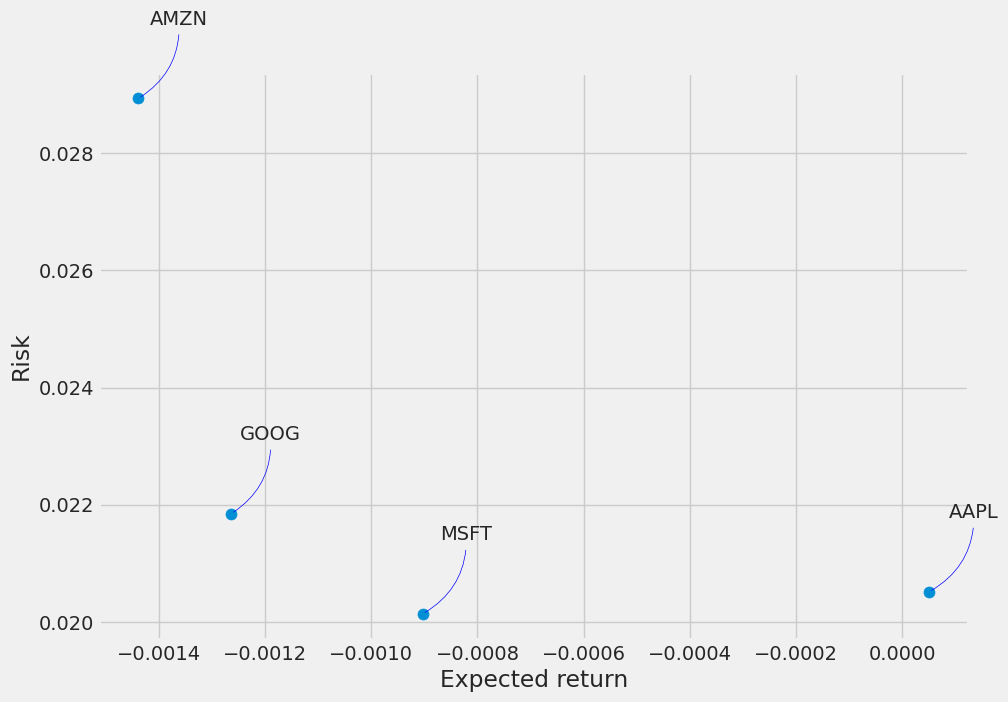

In [31]:
area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(close_df.mean(), close_df.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(close_df.columns, close_df.mean(), close_df.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))